In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
data = pd.read_csv('data/crime_by_state.csv')
data.head()

,STATE/UT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,2001,45,69,22,3,2,6,518,950,312,1006
1,ANDHRA PRADESH,2002,60,98,18,0,4,12,568,830,459,1336
2,ANDHRA PRADESH,2003,33,79,27,1,15,4,615,1234,165,1386
3,ANDHRA PRADESH,2004,39,66,28,0,7,20,474,1319,68,1234
4,ANDHRA PRADESH,2005,37,74,21,0,0,9,459,1244,61,1212


**ELECTION_DATA CLEANING**

In [3]:
gen_order = data['STATE/UT'].value_counts().index
print(gen_order)
data.isnull().sum()

Index(['ANDHRA PRADESH', 'TOTAL (STATES)', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU',
       'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL',
       'A & N ISLANDS', 'ARUNACHAL PRADESH', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY', 'TOTAL (UTs)',
       'PUNJAB', 'ODISHA', 'NAGALAND', 'MIZORAM', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'MADHYA PRADESH',
       'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'TOTAL (ALL-INDIA)'],
      dtype='object')


STATE/UT                                0
Year                                    0
Murder                                  0
Assault on women                        0
Kidnapping and Abduction                0
Dacoity                                 0
Robbery                                 0
Arson                                   0
Hurt                                    0
Prevention of atrocities (POA) Act      0
Protection of Civil Rights (PCR) Act    0
Other Crimes Against SCs                0
dtype: int64

**ELECTION_DATA VISUALISATION**

In [10]:
ELECTION_DATA = data[data["STATE/UT"] == "TOTAL (ALL-INDIA)"]
ELECTION_DATA.isnull().sum()
ELECTION_DATA = ELECTION_DATA[(ELECTION_DATA["Year"] == 2004 )| (ELECTION_DATA["Year"] == 2009)]
ELECTION_DATA.head()

,STATE/UT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
447,TOTAL (ALL-INDIA),2004,654,1157,253,26,72,211,3824,8891,364,11435
452,TOTAL (ALL-INDIA),2009,629,1350,511,42,67,195,4322,11037,168,15091


In [11]:
ELECTION_DATA["Total Crimes"]  = ELECTION_DATA.sum(axis=1, numeric_only=True)
ELECTION_DATA["Year"] = ELECTION_DATA["Year"].astype(int)
ELECTION_DATA["Total Crimes"] = ELECTION_DATA["Total Crimes"].astype(int)
ELECTION_DATA["Total Crimes"] = ELECTION_DATA['Total Crimes'] - ELECTION_DATA["Year"]
ELECTION_DATA

,STATE/UT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Total Crimes
447,TOTAL (ALL-INDIA),2004,654,1157,253,26,72,211,3824,8891,364,11435,26887
452,TOTAL (ALL-INDIA),2009,629,1350,511,42,67,195,4322,11037,168,15091,33412


In [30]:
Max_Crimes = int(ELECTION_DATA['Total Crimes'].max())
Max_Crime_year = int(ELECTION_DATA[ELECTION_DATA["Total Crimes"] == Max_Crimes]["Year"])
print(Max_Crime_year,Max_Crimes);

2009 33412


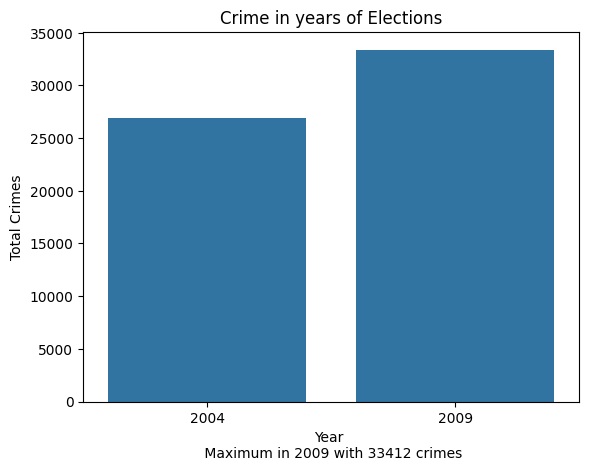

In [33]:
Max_Crimes = int(ELECTION_DATA['Total Crimes'].max())
Max_Crime_year = int(ELECTION_DATA[ELECTION_DATA["Total Crimes"] == Max_Crimes]["Year"])
result = ELECTION_DATA.groupby("Year")["Total Crimes"].sum()
Yearly_Crimes = {}
for year, records in result.items():
    Yearly_Crimes[year] = records
Yearly_Crimes = pd.DataFrame({'Year' : Yearly_Crimes.keys() , 'Total Crimes' : Yearly_Crimes.values()})
base_color = sb.color_palette()[0]
sb.barplot(x = "Year",y = "Total Crimes",data = Yearly_Crimes,color = base_color)
plt.xlabel("Year \n Maximum in {year} with {crime} crimes".format(year = Max_Crime_year,crime = Max_Crimes))
plt.title("Crime in years of Elections");